# Per-Decision Final Experiments
This time, we want to compare the final PDIS method with its vanilla-POIS counterpart, to be inserted in the paper. We need to optimize the delta parameter and compare on 20 runs for each of the standard environments presented in the original POIS paper.

In [15]:
import pandas as pd
import numpy as np
import glob, sys, json, re
import matplotlib.pyplot as plt
import scipy.stats as sts
from sacred_notebook_utils import load_runs, filter_runs, plot_mean_ci, plot_all

In [16]:
runs = load_runs('../sacred_runs/')
print("Loaded runs:", len(runs.keys()))
final_runs = load_runs('../sacred_runs_final/')
print("Loaded final runs:", len(final_runs.keys()))

Loaded runs: 503
Loaded final runs: 80


In [17]:
base_query = {
    'run.status': 'COMPLETED',
    'config.center': False,
    'config.gamma': 0.99,
    'config.clipping': False,
    'config.njobs': 1,
    'config.natural': False,
    'config.policy': 'linear',
    'config.iw_norm': 'none'
}

## Cartpole - Linear Policy
We start by selecting the best delta parameter.

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 904, 109, 570, 10, 160
----------------------------------------
Method: pdis  - Delta: 0.2
Experiments: 5
Seeds: 10, 109, 570, 904, 160
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 20
Seeds: 947, 236, 100, 689, 904, 950, 570, 42, 307, 10, 746, 545, 963, 662, 178, 315, 247, 109, 153, 160
----------------------------------------
Method: pdis  - Delta: 0.4
Experiments: 5
Seeds: 570, 904, 10, 109, 160
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 109, 10, 160, 904, 570


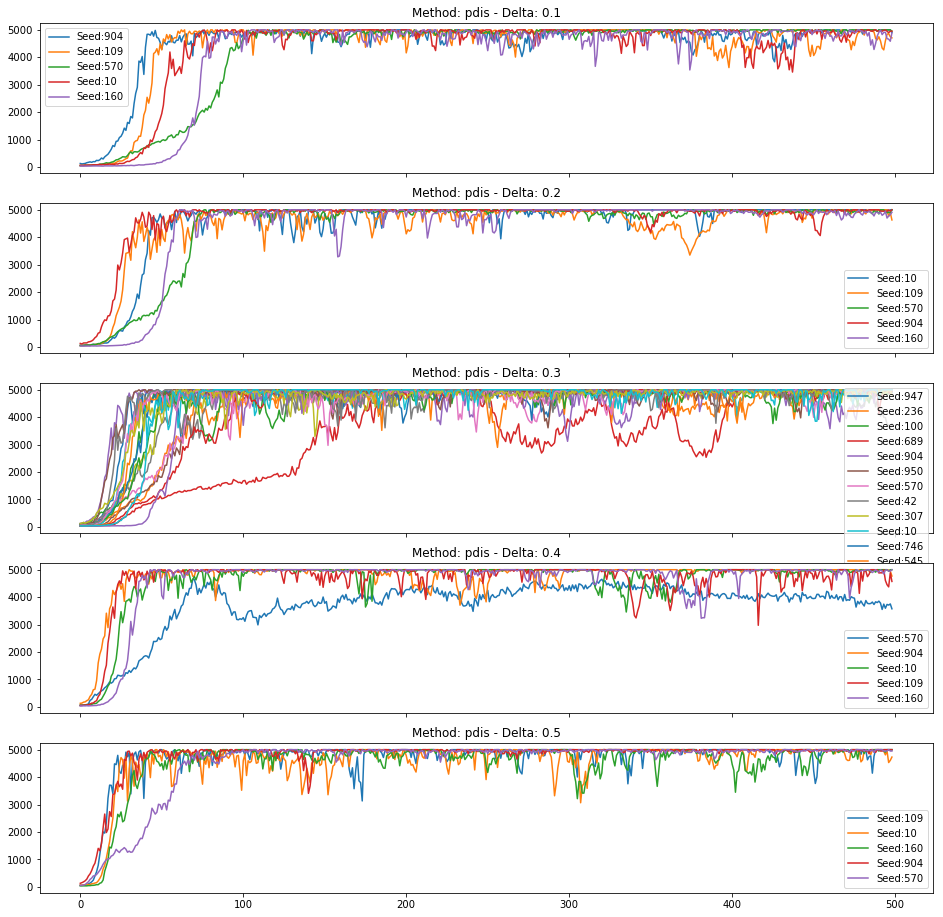

In [19]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.2),
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.4),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                            ]):
    query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

The choice of the delta should be between 0.2 and 0.3, we will go with 0.3 (which is near the 0.4 of the vanilla-POIS).

### Optimized runs
We run PDIS-POIS on cartpole for other 15 seeds with delta selected as 0.3; We also plot the runs aggregated (as in the paper)

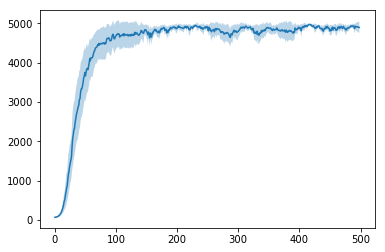

In [20]:
query = {
        'config.env': 'rllab.cartpole',
        'config.iw_method': 'pdis',
        'config.delta': 0.3,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();

## Inverted Double Pendulum - Linear Policy

### Delta tuning

----------------------------------------
Method: pdis  - Delta: 0.1
Experiments: 5
Seeds: 570, 904, 160, 10, 109
----------------------------------------
Method: pdis  - Delta: 0.2
Experiments: 5
Seeds: 160, 570, 109, 904, 10
----------------------------------------
Method: pdis  - Delta: 0.3
Experiments: 20
Seeds: 307, 10, 42, 950, 109, 236, 153, 689, 545, 100, 963, 904, 570, 947, 247, 160, 178, 315, 746, 662
----------------------------------------
Method: pdis  - Delta: 0.4
Experiments: 5
Seeds: 10, 570, 109, 904, 160
----------------------------------------
Method: pdis  - Delta: 0.5
Experiments: 5
Seeds: 570, 109, 10, 160, 904


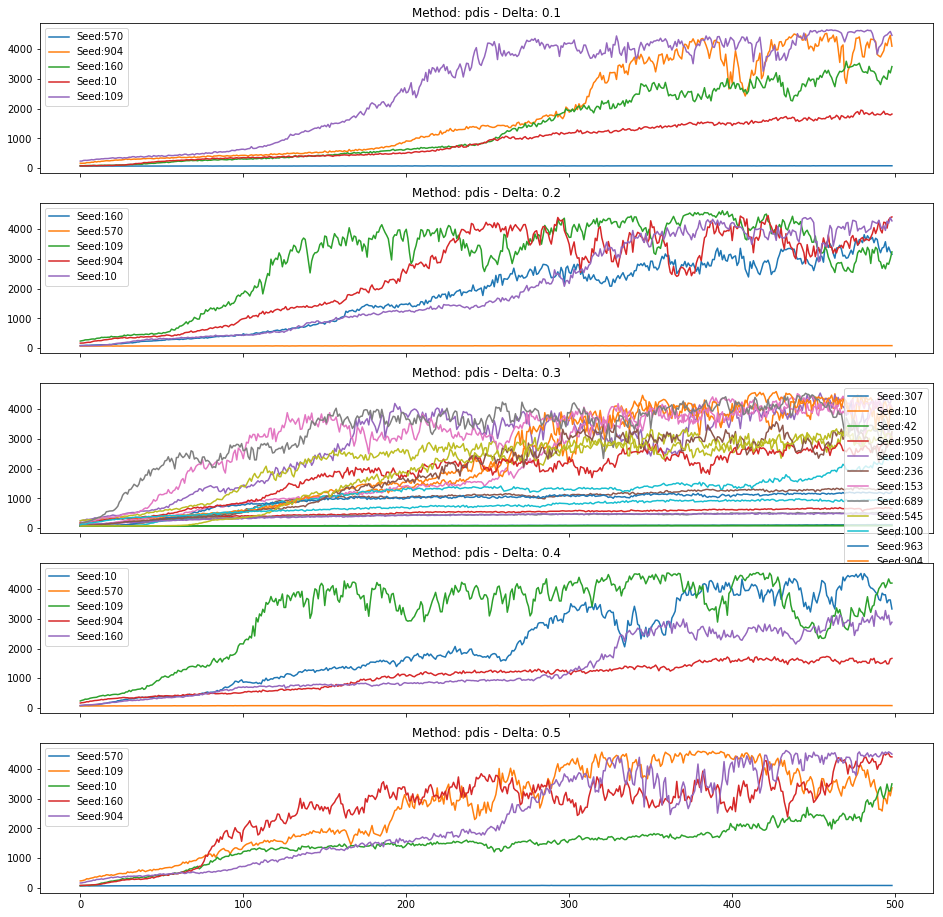

In [21]:
fig, axis = plt.subplots(nrows=5, ncols=1, figsize=(16,16), sharex=True, sharey=True)
for i, (method, bound, delta) in enumerate([('pdis', 'pdis-max-d2', 0.1), 
                                              ('pdis', 'pdis-max-d2', 0.2),
                                              ('pdis', 'pdis-max-d2', 0.3),
                                              ('pdis', 'pdis-max-d2', 0.4),
                                              ('pdis', 'pdis-max-d2', 0.5),
                                            ]):
    query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': method,
        'config.delta': delta,
        'config.bound': bound,
        'config.num_episodes': 100
    }
    filtered_runs = filter_runs({**base_query, **query}, final_runs)
    print('----------------------------------------')
    print("Method:", method, " - Delta:", str(delta))
    print("Experiments:", len(filtered_runs.keys()))
    print("Seeds:", ", ".join(map(str, [filtered_runs[key]['config']['seed'] for key in filtered_runs.keys()])))
    plot_all(filtered_runs, 'EpRewMean', axis[i])
    axis[i].set_title("Method: " + method + " - Delta: " + str(delta))
plt.show();

### Optimized runs

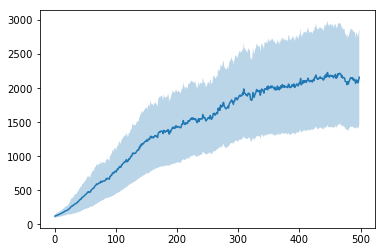

In [22]:
query = {
        'config.env': 'rllab.inverted-double-pendulum',
        'config.iw_method': 'pdis',
        'config.delta': 0.3,
        'config.bound': 'pdis-max-d2',
        'config.num_episodes': 100
    }
filtered_runs = filter_runs({**base_query, **query}, final_runs)
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6,4))
plot_mean_ci(filtered_runs, 'EpRewMean', axis)
plt.show();